[View in Colaboratory](https://colab.research.google.com/github/lozuwa/dojo_machine_learning_emi/blob/master/Lectura_2_Problema_regresion_lineal_Rodrigo_Loza.ipynb)

<h1>Overfitting y underfitting</h1>
<h2>Por: Rodrigo Loza</h2>

In [1]:
# Manipulacion de tensores.
import numpy as np
# Visualizaciones.
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
# Mejora la calidad de graficos. 
%config InlineBackend.figure_format = 'retina'

<h2>Overfitting y underfitting en regresión lineal</h2>
<br>
<h3>Problema</h3>
<p>Dada una distribucion de probabilidad conjunta p(x,y), utilizar machine learning para crear un modelo que pueda predecir la distribución p(x,y).</p>

<p>La distribución de probabilidad conjunta p(x,y) esta descrita por la siguiente función:</p>
$$ f(x) = \sin(2 \pi x) $$


<h2>Base de datos</h2>
Definamos la base de datos.

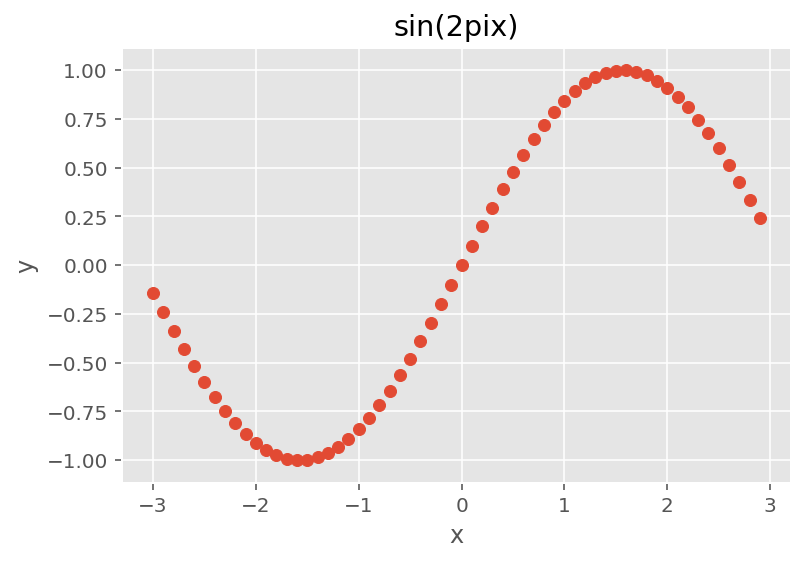

In [2]:
# Datos.
x_sin = np.arange(-3, 3, 0.1)
y_sin = [np.sin(i) for i in x_sin]
# Demos formato a los tensores.
x_sin = x_sin.reshape(-1, 1)
y_sin = np.array(y_sin).reshape(-1, 1)
# Visualizacion.
plt.scatter(x_sin, y_sin)
plt.title("sin(2pix)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h2>Hipótesis</h2>
Definamos la hipotesis. 
$$ f(x;\theta) = \sum_{i=1}^{n} x_{i}\theta_{i} $$

In [4]:
# Valores randomicos para los valores theta.
theta = np.array(np.random.rand()).reshape(1, 1)
# Hipotesis.
h_theta_x = np.dot(x_sin, theta)

<h2>Funcion costo</h2>
Definamos la funcion costo:
$$ J(theta) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{i};theta) - y^{i})^2 $$

In [5]:
def cost_function(x = None, y = None, h_theta_x = None, deriv = None):
    # Local variables.
    if (deriv == None):
        deriv = False
    m = x.shape[0]
    # Logic.
    if (deriv):
        j_theta = (1/(2*m))*np.dot(x.T, (h_theta_x - y))
    else:
        j_theta = (1/(2*m))*np.sum((h_theta_x - y)**2)
    return j_theta

<h2>Algoritmo de optimizacion</h2>
Batch gradient descent.
<br>
Repeat {
$$ \theta = \theta - \alpha * \frac{\partial{J(\theta)}}{\partial{\theta}} $$
}

In [6]:
def bgd(theta = None, x = None, y = None, learning_rate = None, epochs = None):
    # Local variables.
    history_cost_function = []
    # Iterate over epochs.
    for i in range(epochs):
        # Define a local hypothesis.
        h_theta_x = np.dot(x, theta)
        # Update theta.
        theta = theta - learning_rate * cost_function(x = x, y = y, h_theta_x = h_theta_x, deriv = True)
        # Have a record of our progress.
        history_cost_function.append(cost_function(x = x, y = y, h_theta_x = h_theta_x, deriv = False))
    # Return trained values.
    return theta, history_cost_function

<h3>Incrementamos el grado del polinomio de la funcion parametrica y de la base de datos para resolver el problema correctamente. Estamos creando datos artificiales al añadir terminos polinomicos a la dimension x.</h3>

In [7]:
# Incrementar el numero de parametros en la base de datos.
x_aumentado = np.c_[x_sin, x_sin**2, x_sin**3]
# Incrementar el numero de parametros en la funcion parametrica.
theta_aumentado = np.array(np.random.rand(3)).reshape(-1, 1)
# Predicciones.
h_theta_x = np.dot(x_aumentado, theta_aumentado)
# Debug
#print(x_aumentado.shape, theta2.shape, h_theta_x.shape)

<h3>Visualizemos la hipotesis sin entrenar</h3>

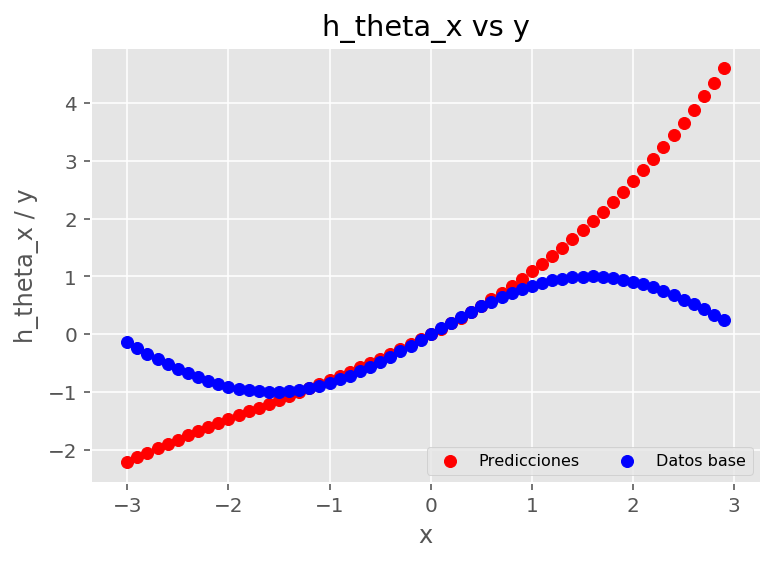

In [8]:
# Grafico.
predictions = plt.scatter(x_sin, h_theta_x, c = "r")
ground_truth = plt.scatter(x_sin, y_sin, c = "b")
plt.title("h_theta_x vs y")
plt.xlabel("x")
plt.ylabel("h_theta_x / y")
plt.legend((predictions, ground_truth),
           ('Predicciones', 'Datos base'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h2>Entrenamiento del algoritmo</h2>
<p>Entrenamos el algoritmo con los siguientes hiperparametros.</p>

In [10]:
# NOTA: Reemplaza las siguientes variables.
learning_rate = 0.01
epochs = 1000
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta_aumentado, x = x_aumentado, y = y_sin, learning_rate = learning_rate, epochs = epochs)

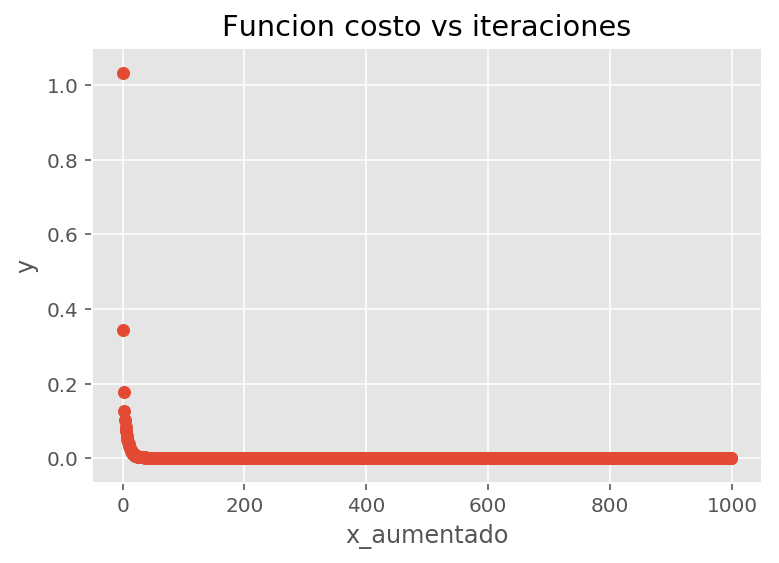

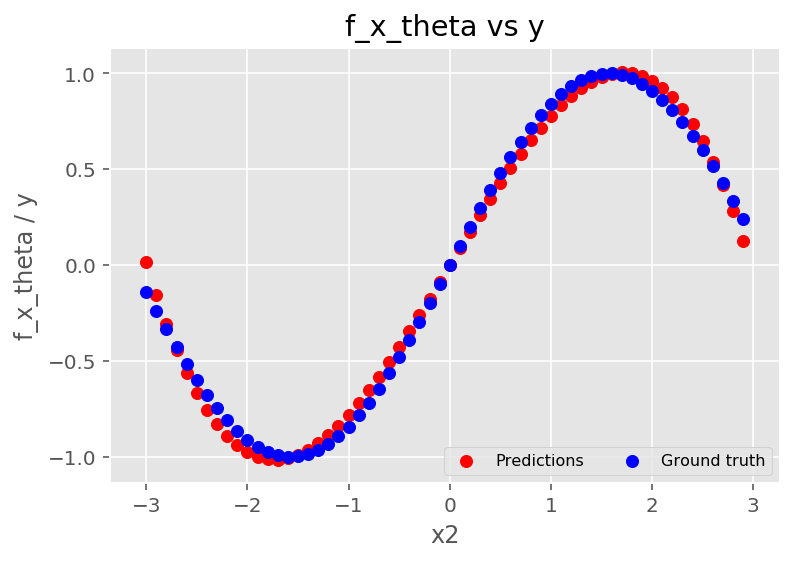

In [14]:
# Plot cost function history.
plt.scatter([i for i in range(len(historia_costo))], historia_costo)
plt.title("Funcion costo vs iteraciones")
plt.xlabel("x_aumentado")
plt.ylabel("y")
plt.show()
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
predictions = plt.scatter(x_sin, h_theta_x, c = "r")
ground_truth = plt.scatter(x_sin, y_sin, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h2>Underfitting</h2>
<p>Underfitting es un problema que afecta a machine learning debido a las siguientes causas.</p>
<h3>Causas</h3>
<ul>
    <li>1. El modelo no tiene la suficiente capacidad respresentativa.</li>
<ul>

In [15]:
# Datos.
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = np.array([np.sin(i) for i in x]).reshape(-1, 1)
theta = np.array(np.random.rand()).reshape(1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 1000
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x, y = y, learning_rate = learning_rate, epochs = epochs)

<p>La hipotesis solo es capaz de representar una familia de funciones lineal, por tanto, jamas podra parecerse a la funcion seno.</p>

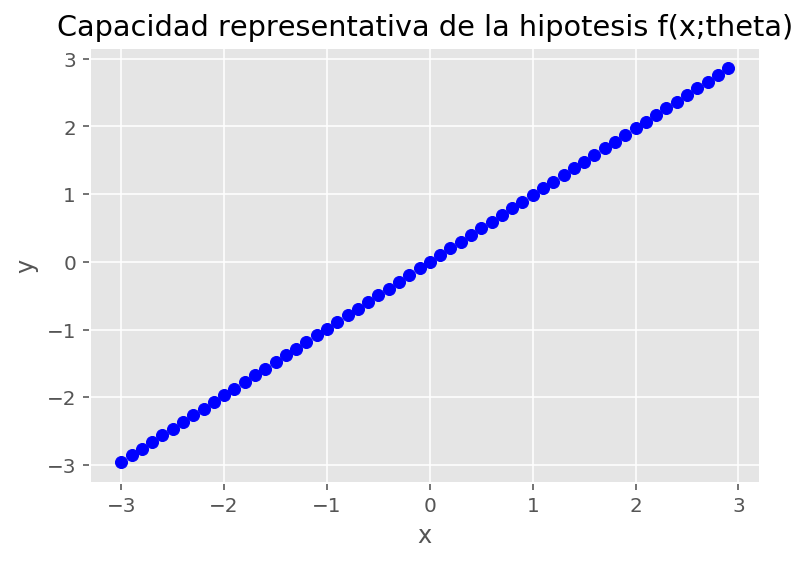

In [16]:
plt.scatter(x, np.dot(x, theta), c = "b")
plt.title("Capacidad representativa de la hipotesis f(x;theta)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<p>Entrenemos el modelo y probemos que la capacidad representativa es el problema.</p>

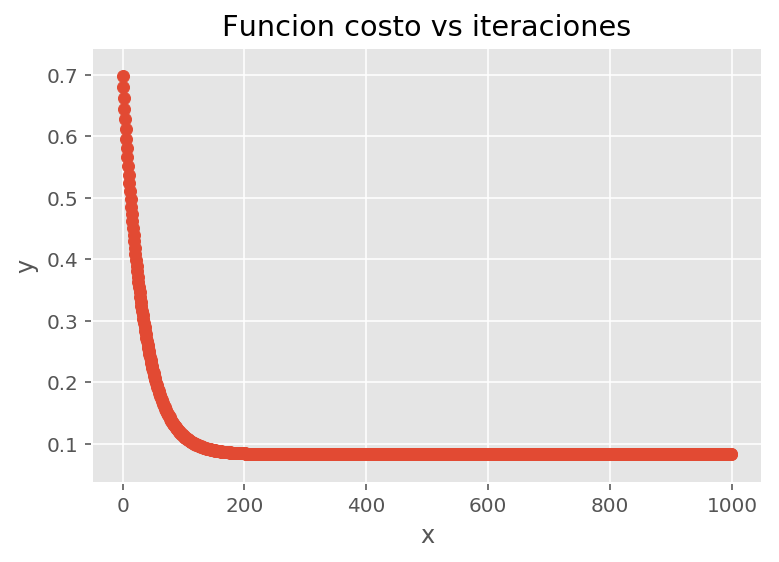

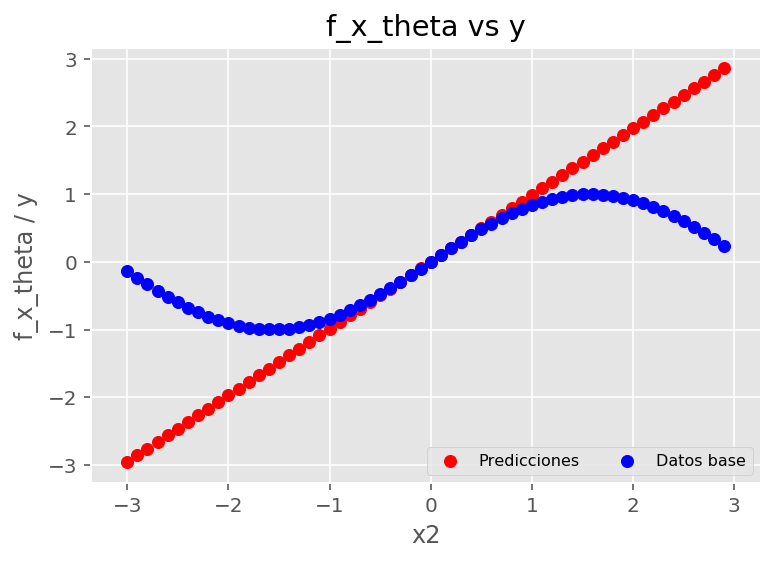

In [17]:
# Predicciones.
h_theta_x = np.dot(x, theta)
# Historia del entrenamiento.
plt.scatter([i for i in range(len(historia_costo))], historia_costo)
plt.title("Funcion costo vs iteraciones")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# Veamos la prediccion graficamente.
predictions = plt.scatter(x, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predicciones', 'Datos base'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h3>Solucion</h3>
<p>La solucion es aumentar el numero de parametros theta.</p>

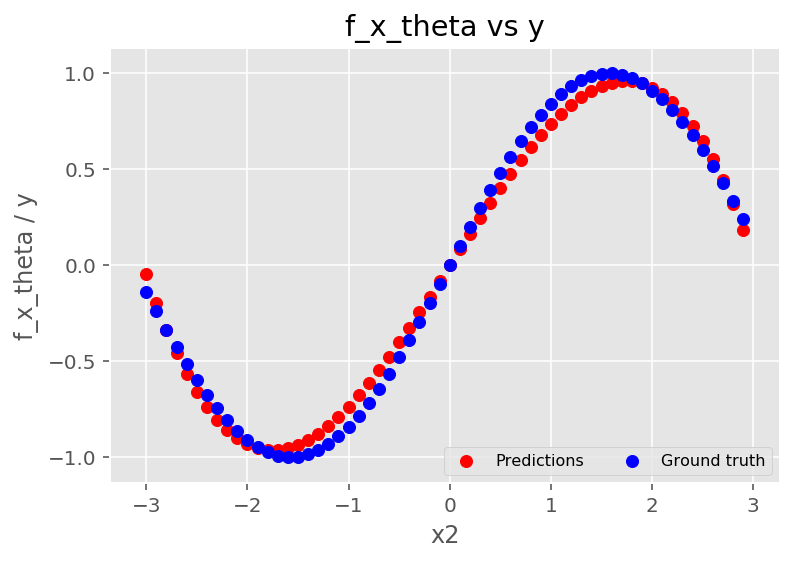

In [18]:
# Datos.
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = np.array([np.sin(i) for i in x]).reshape(-1, 1)
# Aumentar parametros.
x_aumentado = np.c_[x, x**2, x**3]
theta = np.array(np.random.rand(3)).reshape(-1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 1000
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x_aumentado, y = y, learning_rate = learning_rate, epochs = epochs)
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
# Graficamos.
predictions = plt.scatter(x, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h3>Causas</h3>
<ul>
    <li>2. El modelo no tiene suficientes datos.</li>
<ul>

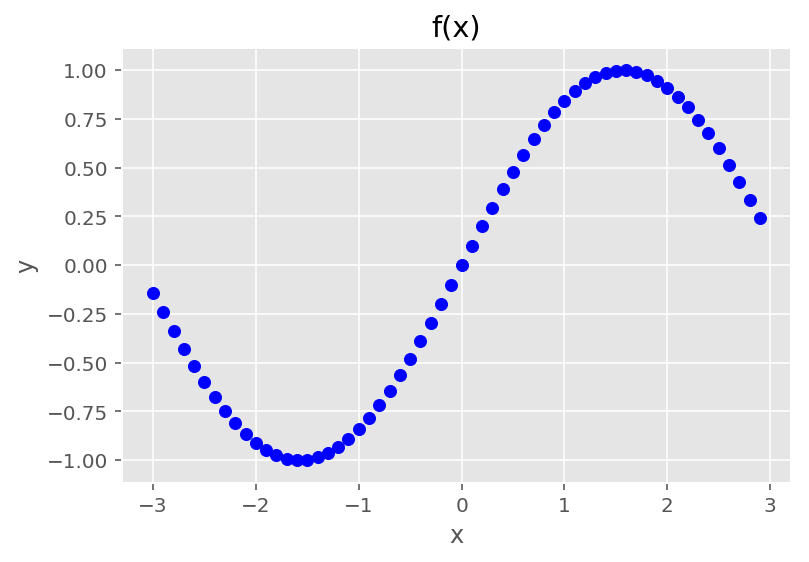

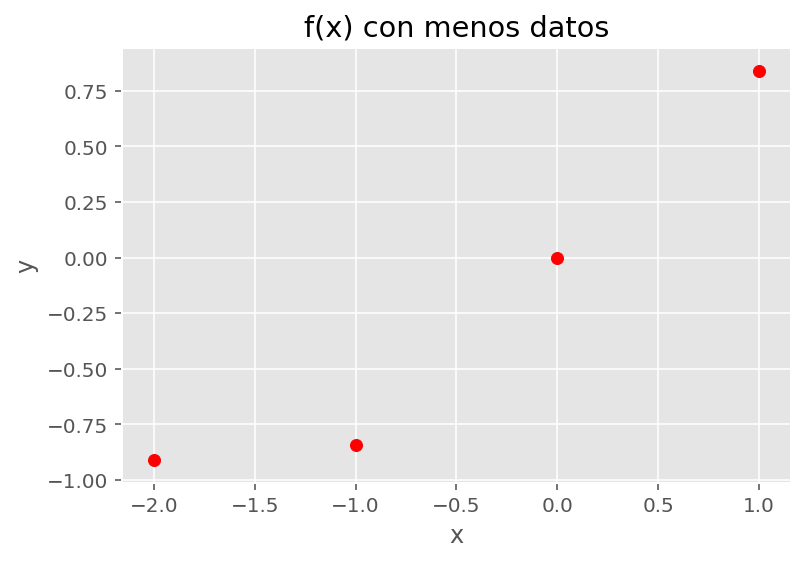

In [19]:
# Datos.
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = np.array([np.sin(i) for i in x]).reshape(-1, 1)
# Muestreamos 6 datos de x.
x_menos_datos = []
y_menos_datos = []
x_medios_datos = []
y_medios_datos = []
for i in range(len(x)):
    if (i%6==0):
        x_medios_datos.append(x[i])
        y_medios_datos.append(y[i])
    if (i%10==0):
        x_menos_datos.append(x[i])
        y_menos_datos.append(y[i])
# Quitamos el primer y el ultimo dato.
x_menos_datos = x_menos_datos[1:-1]
y_menos_datos = y_menos_datos[1:-1]
# Formato.
x_menos_datos = np.array(x_menos_datos).reshape(-1, 1)
y_menos_datos = np.array(y_menos_datos).reshape(-1, 1)
x_medios_datos = np.array(x_medios_datos).reshape(-1, 1)
y_medios_datos = np.array(y_medios_datos).reshape(-1, 1)
# Graficamos.
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
menos_datos = plt.scatter(x_menos_datos, y_menos_datos, c = "r")
plt.title("f(x) con menos datos")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

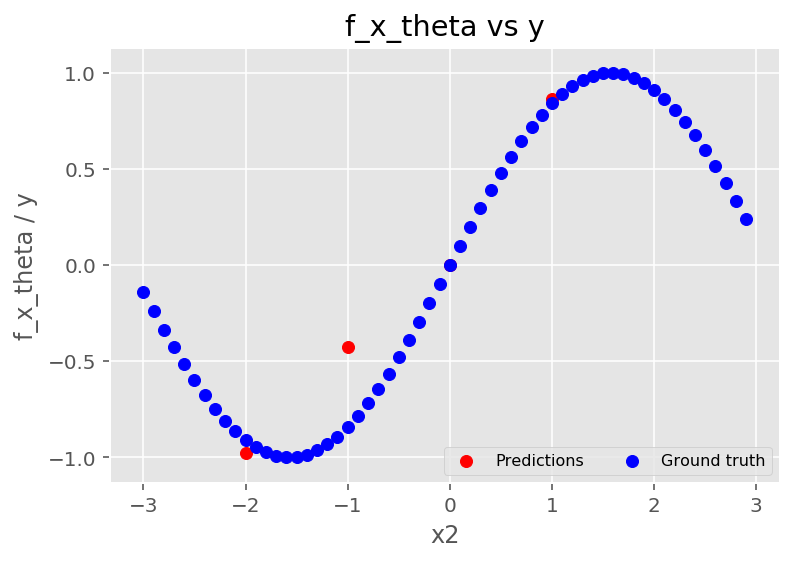

In [20]:
# Aumentar parametros.
x_aumentado = np.c_[x_menos_datos, x_menos_datos**2, x_menos_datos**3]
theta = np.array(np.random.rand(3)).reshape(-1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 1000
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x_aumentado, y = y_menos_datos, learning_rate = learning_rate, epochs = epochs)
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
# Graficamos.
predictions = plt.scatter(x_menos_datos, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h3>Solucion</h3>
<p>La solucion es aumentar la cantidad de datos.</p>

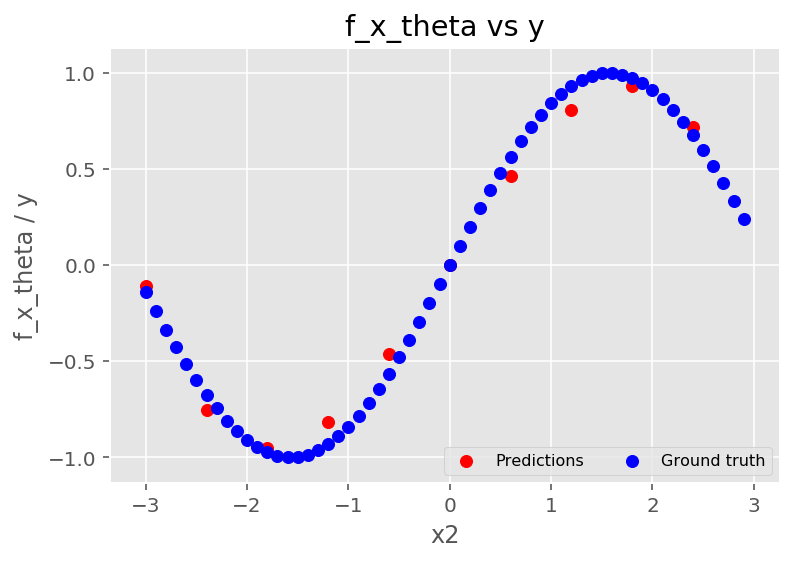

In [21]:
# Aumentar parametros.
x_aumentado = np.c_[x_medios_datos, x_medios_datos**2, x_medios_datos**3]
theta = np.array(np.random.rand(3)).reshape(-1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 1000
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x_aumentado, y = y_medios_datos, learning_rate = learning_rate, epochs = epochs)
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
# Graficamos.
predictions = plt.scatter(x_medios_datos, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h3>Causas</h3>
<ul>
    <li>3. El numero de <strong>epochs</strong> es bajo o la <strong>tasa de aprendizaje</strong> es baja.</li>
<ul>

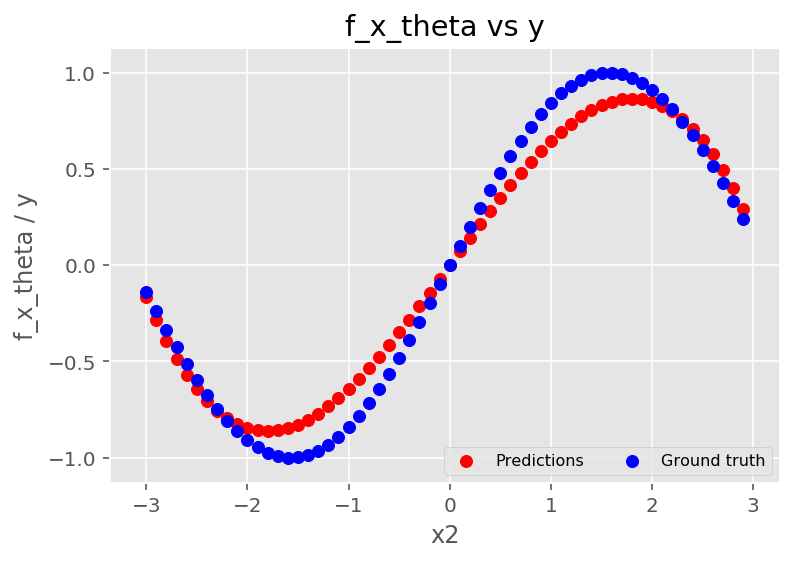

In [28]:
# Datos.
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = np.array([np.sin(i) for i in x]).reshape(-1, 1)
# Aumentar parametros.
x_aumentado = np.c_[x, x**2, x**3]
theta = np.array(np.random.rand(3)).reshape(-1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 100
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x_aumentado, y = y, learning_rate = learning_rate, epochs = epochs)
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
# Graficamos.
predictions = plt.scatter(x, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<h3>Solucion</h3>
<p>Ajustar los hiperparametros.</p>

<h2>Overfitting</h2>
<p>Overfitting es un problema que afecta a machine learning debido a las siguientes causas.</p>
<h3>Causas</h3>
<ul>
    <li>1. El modelo tiene una exagerada capacidad respresentativa.</li>
<ul>

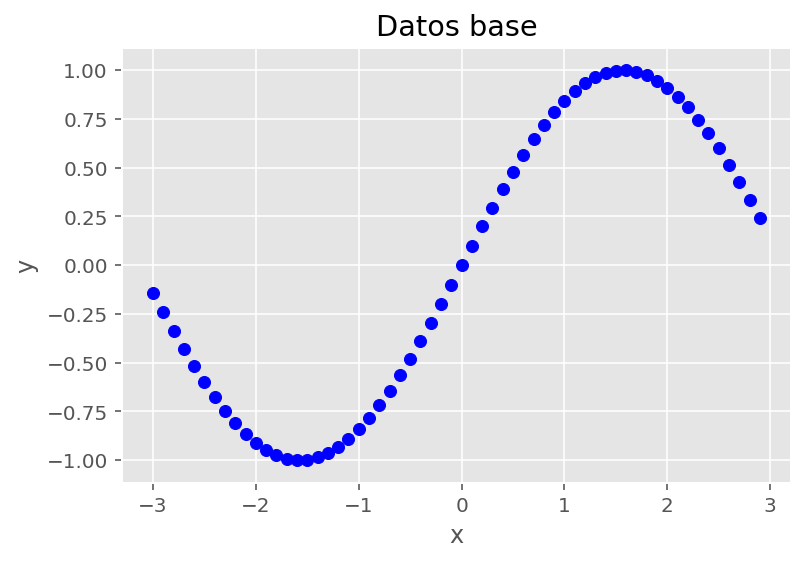

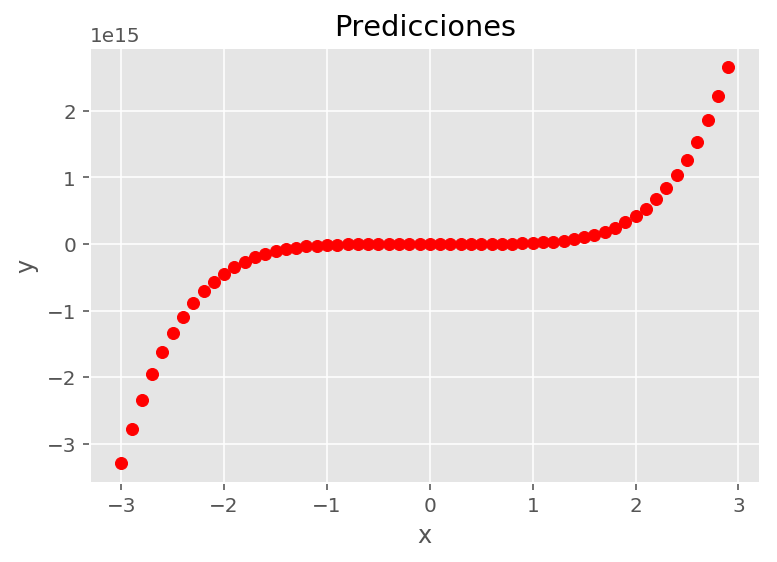

In [36]:
# Datos.
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = np.array([np.sin(i) for i in x]).reshape(-1, 1)
# Aumentar parametros.
x_aumentado = np.c_[x, x**2, x**3, x**4, x**5]
# Otros terminos
# np.log(x)
# np.sqrt(x)
# np.cos(x)
# np.tan(x)
theta = np.array(np.random.rand(x_aumentado.shape[1])).reshape(-1, 1)
# Hiperparametros.
learning_rate = 0.01
epochs = 10
# Corre el entrenamiento.
theta_entrenado, historia_costo = bgd(theta = theta, x = x_aumentado, y = y, learning_rate = learning_rate, epochs = epochs)
# Veamos la prediccion.
h_theta_x = np.dot(x_aumentado, theta_entrenado)
# Graficamos.
ground_truth = plt.scatter(x, y, c = "b")
plt.title("Datos base")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
predictions = plt.scatter(x, h_theta_x, c = "r")
plt.title("Predicciones")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h3>Soluciones</h3>
<ol>
    <li>Reducir las dimensiones del problema.</li>
    <li>Aumentar la cantidad de datos.</li>
</ol>